In [ ]:
# Q2) Given to us is the data of Customer's flights details.
# We need to Perform different Clustering techniques.

# i) Hierarchical Clustering
# ii) K Means Clustering
# iii) DBSCAN Clustering Technique.



# First,we start with Hierarchical clustering.

# i) Hierarchical Clustering

In [ ]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd

In [ ]:
# Loading the dataset
from google.colab import files
files=files.upload()

Saving EastWestAirlines.xlsx to EastWestAirlines.xlsx


In [ ]:
# read the dataset
EWA = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
EWA

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
# First Finding Correlation amoung each categories
EWA.corr()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


In [ ]:
def minmax_func(i):
  x = (i-i.min())/(i.max()-i.min())
  return x

In [ ]:
df_norm = minmax_func(EWA.iloc[:,1:])
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [55.0, 55.0, 65.0, 65.0],
  [105.0, 105.0, 115.0, 115.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [110.0, 110.0, 132.5, 132.5],
  [95.0, 95.0, 121.25, 121.25],
  [85.0, 85.0, 108.125, 108.125],
  [165.0, 165.0, 175.0, 175.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [192.5, 192.5, 222.5, 222.5],
  [170.0, 170.0, 207.5, 207.5],
  [155.0, 155.0, 188.75, 188.75],
  [96.5625, 96.5625, 171.875, 171.875],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [295.0, 295.0, 312.5, 312.5],
  [285.0, 285.0, 303.75, 303.75],
  [262.5, 262.5, 294.375, 294.375],
  [245.0, 245.0, 278.4375, 278.4375],
  [134.21875, 134.21875, 261.71875, 261.71875],
  [355.0, 355.0, 365.0, 365.0],
  [385.0, 385.0, 395.0, 395.0],
  [375.0

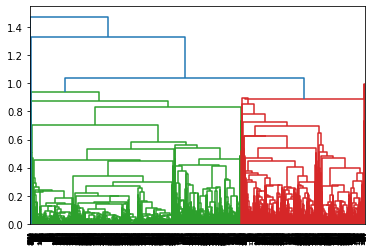

In [ ]:
dendogram = sch.dendrogram(sch.linkage(df_norm,method='centroid'))
dendogram

In [ ]:
# As the datas are very near , we try to group them in 2 Cluster groups

# Creating Clusters

hc = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='complete')
hc

AgglomerativeClustering(linkage='complete')

In [ ]:
y_hc = hc.fit_predict(df_norm)
y_hc

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
EWA['h_clusterid'] = y_hc

In [ ]:
EWA

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [ ]:
# Grouping the clusters in clusterid 0
EWA[EWA['h_clusterid']==0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [ ]:
# Grouping the datas in cluster id 1
EWA[EWA['h_clusterid']==1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
2015,2032,53232,888,4,1,1,80696,65,22100,45,3831,1,1
3235,3257,287033,0,1,1,1,26161,58,12873,53,2272,1,1
3583,3606,160114,500,1,1,1,71954,86,30817,53,1373,1,1
3594,3617,27619,0,4,1,1,83726,68,14050,46,1325,1,1


In [ ]:
# Checking the grouped mean of each clusters
EWA.groupby('h_clusterid').mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
h_clusterid,,,,,,,,,,,,
0,2013.704881,73542.85632,143.911389,2.059074,1.014518,1.012265,17096.29612,11.54418,440.531414,1.325657,4120.4801,0.369712
1,3128.000000,131999.50000,347.000000,2.500000,1.000000,1.000000,65634.25000,69.25000,19960.000000,49.250000,2200.2500,1.000000


CONCLUSION

Since, there are huge datas in the dataset,we combine them into
only 2 clusters to differentiate the dataset.

K MEANS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving EastWestAirlines.xlsx to EastWestAirlines (1).xlsx


In [ ]:
# read the dataset
EWA = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
EWA

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
# Now, we need to find the norm function and minmax function for k means algorithm

In [ ]:
# First,we define a normal distribution function 
# From Z score techniques:

# z = (x-(mean))/(standard_deviation)

def norm_func(i):
  x = (i-i.mean())/(i.std())
  return x

In [ ]:
# Now, apply this function in the given dataset.

x = norm_func(EWA.iloc[:,1:])
x

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451084,-0.186275,-0.769482,-0.09823,-0.062759,-0.702698,-1.103926,-0.328562,-0.362123,1.395280,-0.766823
1,-0.539389,-0.186275,-0.769482,-0.09823,-0.062759,-0.701001,-0.999801,-0.328562,-0.362123,1.379784,-0.766823
2,-0.319991,-0.186275,-0.769482,-0.09823,-0.062759,-0.539185,-0.791550,-0.328562,-0.362123,1.411744,-0.766823
3,-0.583726,-0.186275,-0.769482,-0.09823,-0.062759,-0.689200,-1.103926,-0.328562,-0.362123,1.372037,-0.766823
4,0.239648,-0.186275,1.409295,-0.09823,-0.062759,1.082986,1.499207,1.154788,0.692404,1.363805,1.303755
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547010,-0.186275,-0.769482,-0.09823,-0.062759,-0.356915,-0.791550,-0.185726,-0.098491,-1.314955,1.303755
3995,-0.091454,-0.186275,-0.769482,-0.09823,-0.062759,-0.669284,-0.687425,-0.328562,-0.362123,-1.318829,1.303755
3996,-0.000043,-0.186275,0.683036,-0.09823,-0.062759,0.343761,-0.375049,-0.328562,-0.362123,-1.315439,1.303755
3997,-0.185584,-0.186275,-0.769482,-0.09823,-0.062759,-0.689200,-1.103926,0.028527,-0.098491,-1.315924,-0.766823


In [ ]:
# In K Means Algorithm, we find the no.of clusters 
# We use Elbow Chart

[43977.99999999994, 35400.65686091337, 30891.520081260183, 27439.509147740002, 24535.192715433648, 21084.69981706948, 19161.068795125117, 17312.536146941944, 16039.394387785294, 14723.30065626949]


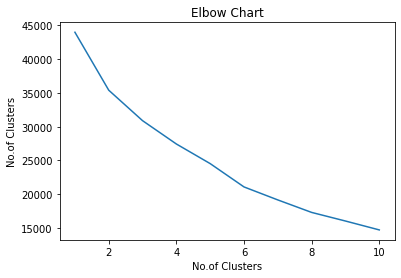

In [ ]:
# WCSS (Within Cluster Sum of Squares)

wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

print(wcss)  
plt.plot(range(1,11),wcss)
plt.title('Elbow Chart')
plt.xlabel('No.of Clusters')
plt.ylabel("No.of Clusters")
plt.show()

We see a sharp edge when it is at 2.So,we take no.of clusters as 2.

In [ ]:
# Building k means algorithm

from sklearn.cluster import KMeans
clusters_new = KMeans(2,random_state=0)
clusters_new.fit(x)

KMeans(n_clusters=2, random_state=0)

In [ ]:
clusters_new.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
EWA['clusterid_new'] = clusters_new.labels_
EWA

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [ ]:
EWA.groupby('clusterid_new').agg(['mean'])

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
clusterid_new,,,,,,,,,,,,
0,1573.950000,132774.874615,258.195385,3.611538,1.010000,1.036923,41461.610000,20.386154,968.721538,2.906923,4941.440000,0.710000
1,2227.168581,45099.804372,89.166358,1.311967,1.016673,1.000371,5432.436828,7.370878,215.051871,0.635050,3722.210819,0.206743


In [ ]:
# Redefining the Clusterid

EWA['clusterid_new'] = EWA['clusterid_new'].replace(0,'Cluster - 0')
EWA['clusterid_new'] = EWA['clusterid_new'].replace(1,'Cluster - 1')

EWA

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,Cluster - 1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,Cluster - 1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,Cluster - 1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,Cluster - 1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,Cluster - 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,Cluster - 1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,Cluster - 1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,Cluster - 1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,Cluster - 1


In [ ]:
EWA.groupby('clusterid_new').agg(['mean'])

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
clusterid_new,,,,,,,,,,,,
Cluster - 0,1573.950000,132774.874615,258.195385,3.611538,1.010000,1.036923,41461.610000,20.386154,968.721538,2.906923,4941.440000,0.710000
Cluster - 1,2227.168581,45099.804372,89.166358,1.311967,1.016673,1.000371,5432.436828,7.370878,215.051871,0.635050,3722.210819,0.206743


In [ ]:
EWA['clusterid_new'].value_counts()

Cluster - 1    2699
Cluster - 0    1300
Name: clusterid_new, dtype: int64

In [ ]:
# DBSCAN TECHNIQUE

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving EastWestAirlines.xlsx to EastWestAirlines (2).xlsx


In [ ]:
# read the dataset
EWA = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
EWA

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
EWA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [ ]:
data = EWA.iloc[:,1:]
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
stscalar = StandardScaler().fit(data)
X=stscalar.transform(data)
X.reshape(1,-1)

array([[-0.45114078, -0.18629869, -0.76957841, ..., -0.36216787,
        -1.31754109, -0.7669193 ]])

In [ ]:
dbscan = DBSCAN(eps=1.73,min_samples=12)
dbscan.fit(X)

DBSCAN(eps=1.73, min_samples=12)

In [ ]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
data['Cluster']=pd.DataFrame(dbscan.labels_)
data[0:5]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [ ]:
data['Cluster'].value_counts()

 0    2424
 1    1253
-1     307
 2      15
Name: Cluster, dtype: int64

In [ ]:
(len(data[data['Cluster']==-1])/len(data))*100

7.676919229807452

In [ ]:
# Silhoutte Score Calculation

X = metrics.silhouette_score(X,dbscan.labels_)
X

0.2509490729159852

The Silhoutte Score of 0.25 says that the clusters are overlapping in the dataset.

Overall Inferences

1) The dataset is huge.So,there is a high similarity between the datas entered.  .

2) We could only club the clusters into 2 gropus.

3) This dataset has a huge overlapping issue.